# Sediment Layered Vertically in Advection (SYLVIA v 1.0) Algorithm Development & Testbed for Output

 ## Technical Documentation 

**Impact Statement**
1.	With limited data available for total suspended solids (TSS) within aquatic ecosystems, driven by land use changes and climate variability, the need for predictive sedimentation modeling in aquatic ecosystems is critical. SYLVIA v1.0, is a sedimentation model within the US EPA Hydrologic Micro Services (HMS), used to build user-defined workflows for decision support systems and comprehensive surface water modeling within the United States. The sedimentation model is a predictive tool which provides estimates for TSS  using hydrodynamic characteristics of stream reaches using user-defined sediment parametrization to reflect the settling, resuspension and deposition processes in the water column. With HMS, users are enabled with an abundance of environmental datasets and models to develop idealistic boundary conditions for predictive modeling of stream networks for assessing water quality and water quantity.  

2.	Meeting Info (name and url if there is one)
American Water Resource Association, 2020 Annual Water Resources Conference

https://www.awra.org/Members/Events_and_Education/Events/2020_Annual_Conference_Call_for_Abstracts.aspx

3.	Keywords
Water quality, water quantity, sediment model, NHDPlus V2, HMS, COMID, settling, resuspension, deposition



## **Abstract**

Hydrologic Micro Services (HMS) sediment module using the Sediment Yield’s Layered Vertically in Advection (SYLVIA v1.0) algorithm
Kar’retta Venable $^a$, Chris Knightes $^b$, John M. Johnston $^c$, Rajbir Parmar $^c$, Kurt Wolfe $^c$

$^a$ Oak Ridge Institute for Science Education (ORISE), U.S. Environmental Protection Agency (USEPA), Office of Research and Development, Center for Environmental Measurement and Modeling, Environmental Processes Division, Landscape and Aquatic Systems Modeling Branch, 960 College Station Road, Athens, GA 30605, USA, E-mail:  venable.karretta@epa.gov

$^b$ USEPA Center for Environmental Measurement and Modeling, 27 Tarzwell Drive, Narragansett, RI 02882, USA, email: knightes.chris@epa.gov

$^c$ USEPA Center for Environmental Measurement and Modeling, 960 College Station Road, Athens, GA 30605, USA, email: johnston.johnm@epa.gov

	 
   Towards the goal of creating a comprehensive water quality/quantity system of reusable and inter-operable modeling components, the USEPA developed Hydrologic Micro Services (HMS - https://qed.epacdx.net/hms/). HMS is a series of microservice data provisioning and hydrologic processes used to build workflows for  decision support systems and provide comprehensive surface water modeling within the United States.  When conducting a modeling exercise, users identify which modules will be utilized to form a workflow specific to their prediction/forecast needs. HMS outputs include flow and water quality variables associated with nutrient and sediment dynamics of aquatic ecosystems at enhanced spatial and temporal resolution of predictions/forecasts. With limited available data for total suspended sediment (TSS), modeling particle advection and settling dynamics is essential for developing total maximum daily loads (TMDLs) and biotic solids production which serve as eutrophication agents in aquatic ecosystems.   
	
   The SYLVIA v1.0  module within HMS provides the location, concentration, and mass loadings for TSS introduced into a NHDPlus V2 stream segment (COMID) network. NHDPlus V2 is a national, medium resolution stream and river data product maintained by the EPA Office of Water (https://www.epa.gov/waterdata/nhdplus-national-hydrography-dataset-plus). Model initialization is performed through data acquisition from the HMS workflow beginning with importing hourly  streamflow, stream velocity, and average depth for the COMIDs selected within the network domain. Additionally, users provide conditional descriptive and processed based particle characteristics capturing settling, resuspension, and depositional processes.  These regimes are implemented with an iterative mass balance advective transport approach. SYLVIA is a vertically-stratified, three-layer water column model, where the bottom layer represents the surface benthic layer. Here, we present a technical demonstration of the underlying algorithms, the user defined state variables, and a representative case study analysis. 


## State Variables

https://usepa-my.sharepoint.com/personal/venable_karretta_epa_gov/_layouts/OneNote.aspx?id=%2Fpersonal%2Fvenable_karretta_epa_gov%2FDocuments%2FKarretta%20%40%20Environmental%20Protection%20Agency%20%28EPA%29&wd=target%28Research%20Activities.one%7C63728977-CD6F-42EF-AC8B-1DF233E68C7F%2FNaming%20acronyms%20and%20Abbreviations%7CD37C873E-68A2-45C8-9ACD-42A2CFF93D31%2F%29
onenote:https://usepa-my.sharepoint.com/personal/venable_karretta_epa_gov/Documents/Karretta%20@%20Environmental%20Protection%20Agency%20(EPA)/Research%20Activities.one#Naming%20acronyms%20and%20Abbreviations&section-id={63728977-CD6F-42EF-AC8B-1DF233E68C7F}&page-id={D37C873E-68A2-45C8-9ACD-42A2CFF93D31}&end

## Model Initiation of State Variables
The water characteristics derived from known user inputs and reach level COMID information where hourly discharge and streamflow velocity are obtained from NHDPlus V.2 data to calculate the cross-sectiononal area and displacement per second and hour and calcualted for the TSS. (This will be turned into an API to delvier an array with a name derived from the COMIDs collected with and automatic calculation for water characteristics and time of travel )  

**From upswaterchar.f95**

Print *, "Enter water depth ($m$), median diameter size ($m$) and length ($m$)"
   
   read(5, *) h, da, lc

Print *, "Enter your water discharge ($\frac{m ^ 3}{s}$) and water velocity ($ \frac {m}{s}$)"
   
   read(5, *) q, u  

Where the cross-sectional area, $a$, is:

$$a = \frac{q}{u}$$

where q is the hourly discharge ($\frac{m ^3}{s}$), and u is the stream velocity ($ \frac {m}{s}$)

With the assumption that the displacement in 1 sec ($m$):

$$ dx = u * 1 sec $$

and the displacement in 1 day (86400s) ($m$) 

$$dx_1= u * 86400 sec $$
      

User defines the type of TSS which is deposited through choosing the particle type and a density ($g/cm^3$) and its diameter size ($m$) will be entered through a series from an iterative loop based on the number of solids entered.(from upsgransize.f95 and subroutine grainsz)

* Organic Matter (om=1.270)   
* Siliceous Minerals (sm=2.650)
* Garnett Sands (gs=4.000)
* Enter density  
where, 
$$rhos = density (g/cm^3)$$

$$and$$ 

$$ds = grain size (m)$$

and designates which layer is the particle is within where the settling velocities are calculated based upon (from upslocation.f95) - fig(1): 

* Top of Water Column (1) 
* Bottom of Water Column (2) 
* Surface Benthic Layer (3) 



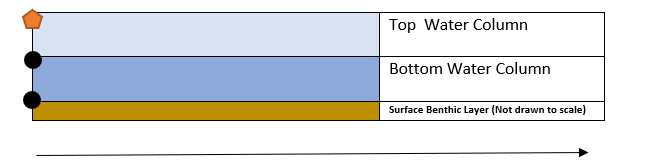

Fig (1) Model design for Sylvia v 1.0. This initation has used a garnet sand in the top layer and organic matter in the bottom water column layer and the surface benthic layer starting at the top of the layer depth.

From the depth ($h$) in ($m$) entered of the channel, maximum layer depths ($dlayer$) are calculated for each layer and the maximum benthic layer depth ($maxlyrd_b$) where:

$$dlayer = \frac {h}{ns-1}$$
where $ns = number of layers$ (3, parameter declaration) ,
used for an inequality swithc to check vertical displacement ($pdy$) depth of active layers) and

$$maxlyrd_b=h+ 0.1 $$, to provide the maximum depth of pressurized burial prior to accumulation growth in the benthic layer (~10 cm = .1m based on WASP8 documentation)

For normalization of the streamflowm, $q$, in each layer for equal partioning of the discharge for total initial amount of TSS for each layer the, volume of water in each segment is designated as, $svol$, where: 

$$svol = \frac {q}{dlayer}$$



Maximum Time of Travel (tmx)
$$tmx = \frac {lc}{u}$$

Maximum Time of Travel in 1 hour for current COMID (tmxc)
$$tmxc = \frac {tmx}{3600}$$



The user is then provided with 
pdx=0
dy=0
pdy=0
int_con(1:3) = (/tmx, dx, dx_1/) 
write(10,*)"Your initial", comid,  "and max time of travel and displacement(per day and per sec) is=", int_con


"Would you like to choose (1) User Defined Legacy (2) Descriptive, (3) Van Rijn"
read (5,*) so


## Output Results